# Mushroom Project

In [67]:
# Importing the necessary packages/libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
import pickle
import joblib

Read the raw mushroom.csv file directly from the GitHub link

In [68]:
link="https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv"
df = pd.read_csv(link)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# EDA

So after taking a look at the dataset I can see that the class column is the label where we will need to classify all the rows in terms of edible and poisonous mushrooms. Remaining columns are going to be our feature which will help us in determining the desired output indicating this to be a Classification problem.

In [69]:
df.shape

(8124, 23)

With the help of shape method we are able to know clearly that there are a total of 8124 rows and 23 columns.

In [70]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

After getting to know the total number of rows and colums present in the dataset the most important thing is to check if there are any null values in the data to treat them or remove them as needed.

In our mushroom dataset I see that there are no null values present in any column so we won't have to worry about missing data.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

With the help of info method we can see the names of all columns present in the dataset along with the non-null count and data type of those colums. It also shows the memory usage by this particular data frame.

In [72]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Here after using the describe method we see that all the data present in the columns are alphabets and not numbers which only shows the total count of rows present, the unique number of categories present in each column, the top/highest number of letter present in those columns and finally the frequency/number of times the top alphabet is present in the column.

Since such a data is not going to provide any kind of insight we will need to change these object data into numerical form but to do that we need to first understand what these letters/alphabets represent.

From index 1 to 22 we have all our feature data whereas index 0 is our label that represents the class containing two categories namely e=edible and p=poisonous.

In [73]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

The columns function allows us to list now the names of all the features and label to be used further.

In [74]:
# Checking the label column for any imbalance in target label 'class'

count = df['class'].value_counts('e','p') * 100
count # This gives us the percentage of number of poisonous class divided by the entire class data

e    51.797144
p    48.202856
Name: class, dtype: float64

The result of poisonous class is 48.202856 percent and edible class is 51.797144 percent proving that the label data is not imbalanced and does not need to be treated

# Visualization of class label data

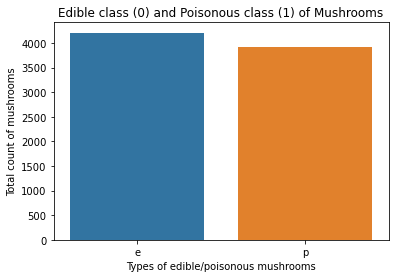

In [75]:
count = df['class'].value_counts()
sns.barplot(count.index, count.values)
plt.ylabel('Total count of mushrooms') # Number of rows with categorical values
plt.xlabel('Types of edible/poisonous mushrooms') 
plt.title('Edible class (0) and Poisonous class (1) of Mushrooms')
plt.show()

After checking the percentage for imbalance data in the class label we cross verified the same via a visual representation using the barplot fuction

# Encoding

In [76]:
# Label Encoder

conversion = list()

encoder = LabelEncoder()

for column in range(len(df.columns)):
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
    conversion_dict = {index: label for index, label in enumerate(encoder.classes_)}
    conversion.append(conversion_dict)
    
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


Used the label encoder method to convert all the categorical data in each column to numerical data

In [77]:
conversion # This displays the alphabet to number relation

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

The "conversion" variable simply defines the mapping of each categorical alphabet to it's numerical counterpart

In [78]:
# Trying to check how many unique values are present in each of the columns

for col in df.columns:
    print(col,":", len(df[col].unique()), 'category')

class : 2 category
cap-shape : 6 category
cap-surface : 4 category
cap-color : 10 category
bruises : 2 category
odor : 9 category
gill-attachment : 2 category
gill-spacing : 2 category
gill-size : 2 category
gill-color : 12 category
stalk-shape : 2 category
stalk-root : 5 category
stalk-surface-above-ring : 4 category
stalk-surface-below-ring : 4 category
stalk-color-above-ring : 9 category
stalk-color-below-ring : 9 category
veil-type : 1 category
veil-color : 4 category
ring-number : 3 category
ring-type : 5 category
spore-print-color : 9 category
population : 6 category
habitat : 7 category


This is a simple for loop to display the column names along with the number of categories each of them hold.

In [79]:
# One Hot Encoder

OHE = OneHotEncoder(handle_unknown='ignore', sparse=False, categories='auto')

col_transform = make_column_transformer((OHE, ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']), remainder='passthrough')

col_transform.fit_transform(df)

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

Used the one hot encoder on all the feature columns to get the proper variation on all the category present in each column.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [80]:
X = df.drop('class', axis=1)
Y = df['class']

The Y variable here represents the label data while the X variable represents all the features in the dataset except the label since it was dropped from the dataset

In [81]:
Y # Displaying just the label

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [82]:
X # Displaying all the features except the label

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


We can see how there are no object data present in any of the rows anymore for our entire data set after applying the encoding techniques.

# Scaling

Creation of unbiased data for features

In [83]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [84]:
X_scaled

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


Even though the original data was categorical and after applying encoding technique and uniform output was received I used to scaling method to ensure that no bias data is resulted once I start building the machine learning models.

# Visualization with the help of a Heatmap

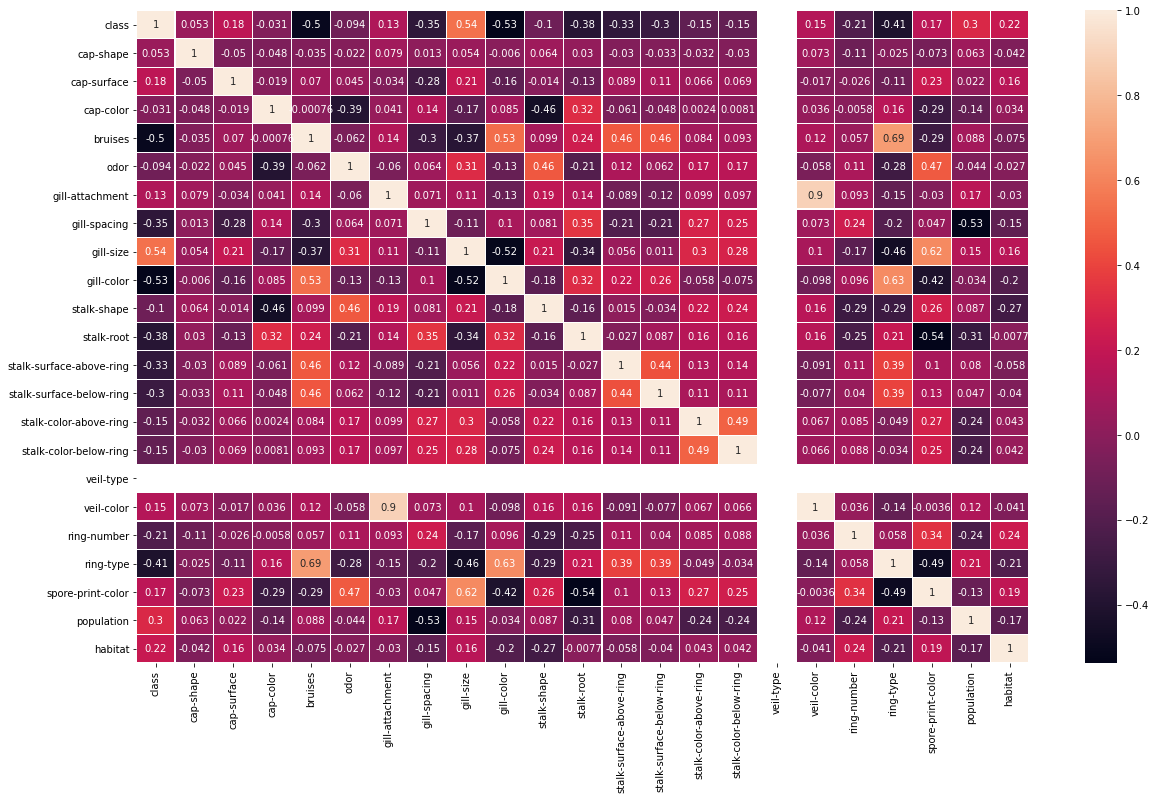

In [85]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),linewidths=0.1, annot=True, annot_kws={"size": 10})
plt.show();

Looking at the above basic heat map we see veil-type is completely blank and does not contribute towards any insight creatings a gap so dropping it further to improvise.

I find remaining column data valuable therefore I will not lose any of those data. Since there is no curse of dimentionality visible will not be applying anymore techniques either.

In [86]:
df = df.drop(["veil-type"],axis=1)

Now I will try to get rid of the upper triangle in the above heat map since it only shows the same value as the lower triangle and removing the duplicates will assist me in visualizing it with better clarity.

In [87]:
hide = np.zeros_like(df.corr()) # Creating an array with zeros that is equal to our data set
upper_triangle_indices = np.triu_indices_from(hide)
hide[upper_triangle_indices] = True
# Transforming all zero's matrix and filling it with one's in just the upper triangle array

This piece of code helps us in eliminating the duplicate upper triangle of our heat map.

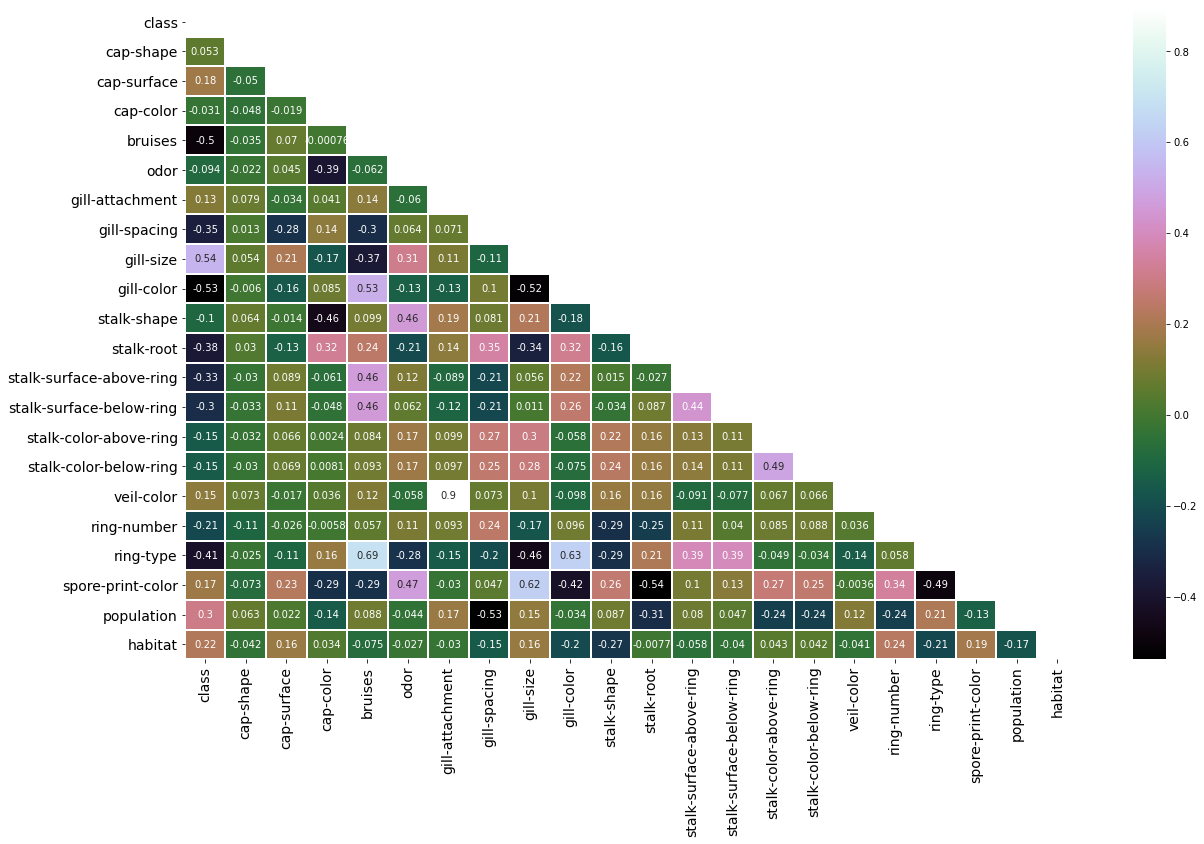

In [88]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), mask=hide, linewidths=1.0, annot=True, cmap='cubehelix')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

This heatmap now contains only the lower triangle data where in it becomes easier to compare the class data (target label) with other feature colums in our data set. If I compare class (label) with all the other feature columns the dark boxes represent that they are the least correlated and the bright ones are the major columns contributing towards the label prediction. However I am not going to lose any of the data to ensure we have enough samples present for our model building.

In [89]:
df.skew() # Checking the skewness of coulmns where acceptable range is between -0.5 to 0.5

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

Here we see skewness on few columns that are outside the acceptable range of -0.5 to 0.5

But they are all categorical columns therefore we are not going to treat the skewness and it is just going to be part of our observation

In [90]:
df.describe() # Checking the data set post scaling technique now

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


After performing the scaling technique to get unbiased data we used the describe method again and this time we can see the count, mean, standard deviation, minimum, maximum and the inter quantile ranges present in our data set

# Visualization with a Histogram

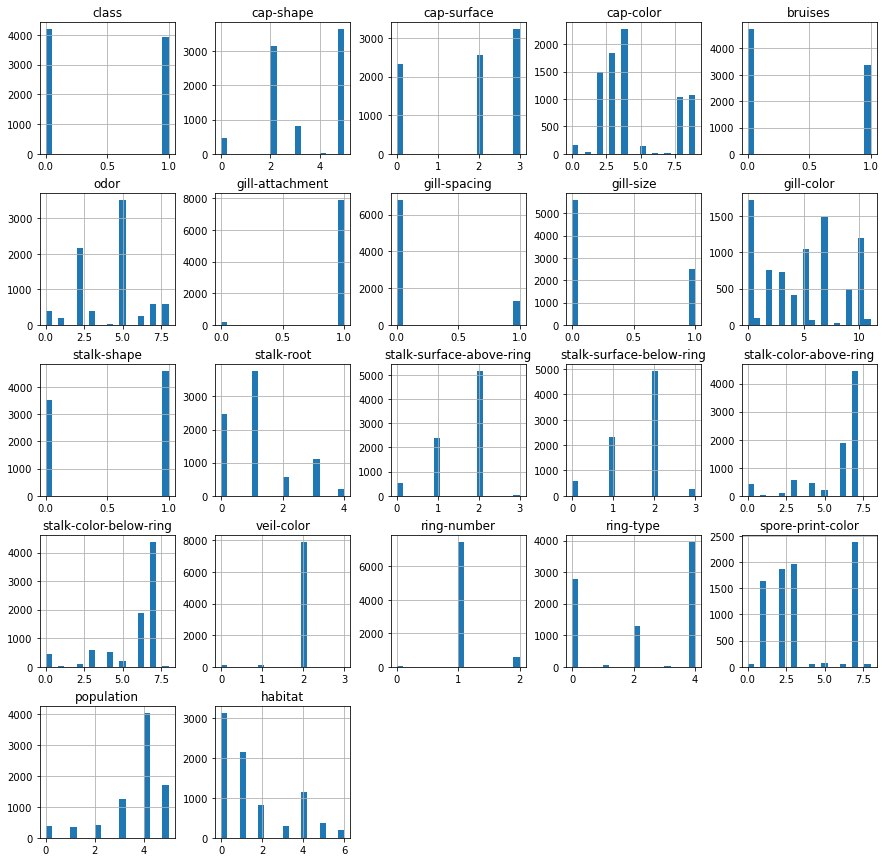

In [91]:
df.hist(bins=20, figsize=(15,15));

Applying histogram on all the columns present in our dataset we are able to clearly see the categories seperated by bins and giving a visual representation on data present within those categories of a column

# Creating the training and testing data sets

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state=21, shuffle=False)

I am taking 80 percent of the total data present in the dataset for training purpose and the remaining 20 percent will be used in testing purpose during model building

# Machine Learning Model for Classification

In [93]:
# Model Selection

log_model = LogisticRegression()
svm_model = SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
dt_model = DecisionTreeClassifier(random_state=21, max_depth=15)
rf_model = RandomForestClassifier(max_depth=15, random_state=111)
knn_model = KNeighborsClassifier(n_neighbors=15)

I have selected 5 classification models to be used in determining the categories of edible/poisonous mushrooms

In [94]:
# Training the models

log_model.fit(X_train, Y_train)
svm_model.fit(X_train, Y_train)
dt_model.fit(X_train, Y_train)
rf_model.fit(X_train, Y_train)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=15)

I have now trained all the 5 machine learning models with 80 percent of the data set ensuring they are able to classify the test data correctly

In [95]:
# Checking the accuracy scores of the models

predictions_log = log_model.predict(X_test)
predictions_svm = svm_model.predict(X_test)
predictions_dt = dt_model.predict(X_test)
predictions_rf = rf_model.predict(X_test)
predictions_knn = knn_model.predict(X_test)

print(f"Accuracy for Logistic Regression: {accuracy_score(Y_test, predictions_log)}")
print(f"Accuracy for Support Vector Machine: {accuracy_score(Y_test, predictions_svm)}")
print(f"Accuracy for Decision Tree: {accuracy_score(Y_test, predictions_dt)}")
print(f"Accuracy for Random Forest: {accuracy_score(Y_test, predictions_rf)}")
print(f"Accuracy for K Nearest Neighbors: {accuracy_score(Y_test, predictions_knn)}")

Accuracy for Logistic Regression: 0.8904615384615384
Accuracy for Support Vector Machine: 0.9593846153846154
Accuracy for Decision Tree: 0.9901538461538462
Accuracy for Random Forest: 0.9944615384615385
Accuracy for K Nearest Neighbors: 0.9347692307692308


With the help of accuracy score we are able to determine the value upto 16 decimal places which helps us in getting a better understanding on the model validation

In [96]:
# Checking the classification report for the models

clfreport_log = classification_report(Y_test, predictions_log)
clfreport_svm = classification_report(Y_test, predictions_svm)
clfreport_dt = classification_report(Y_test, predictions_dt)
clfreport_rf = classification_report(Y_test, predictions_rf)
clfreport_knn = classification_report(Y_test, predictions_knn)

print(f"Classification Report for Logistic Regression:\n",clfreport_log)
print(f"Classification Report for Support Vector Machine:\n",clfreport_svm)
print(f"Classification Report for Decision Tree:\n",clfreport_dt)
print(f"Classification Report for Random Forest:\n",clfreport_rf)
print(f"Classification Report for K Nearest Neighbors:\n",clfreport_knn)

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81       507
           1       0.89      0.96      0.92      1118

    accuracy                           0.89      1625
   macro avg       0.89      0.85      0.87      1625
weighted avg       0.89      0.89      0.89      1625

Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       507
           1       0.96      0.98      0.97      1118

    accuracy                           0.96      1625
   macro avg       0.96      0.95      0.95      1625
weighted avg       0.96      0.96      0.96      1625

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       507
           1       0.99      0.99      0.99      1118

    accuracy                           0.

Using the classification report gives us the accuracy score only upto 2 decimal places but provides us with other details such as the precision, recall and f1 score which comes in handy while determinig the best model.

In [97]:
# Using Cross Validation Score

print(f"Cross Validation Score for Logistic Regression:", cross_val_score(log_model,X_scaled,Y,cv=10).mean())
print(f"Cross Validation Score for Support Vector Machine:", cross_val_score(svm_model,X_scaled,Y,cv=10).mean())
print(f"Cross Validation Score for Decision Tree:", cross_val_score(dt_model,X_scaled,Y,cv=10).mean())
print(f"Cross Validation Score for Random Forest:", cross_val_score(rf_model,X_scaled,Y,cv=10).mean())
print(f"Cross Validation Score for K Nearest Neighbors:", cross_val_score(knn_model,X_scaled,Y,cv=10).mean())

Cross Validation Score for Logistic Regression: 0.8875029538472725
Cross Validation Score for Support Vector Machine: 0.9576742466932059
Cross Validation Score for Decision Tree: 0.956689025018329
Cross Validation Score for Random Forest: 0.963216118614388
Cross Validation Score for K Nearest Neighbors: 0.9463443489114693


Inference: The best model presented by comparing accuracy score, f1 score and cross validation score is "Random Forest"

Also we evaluate quantitatively overfitting / underfitting issue with the help of cross-validation.

In [98]:
Final_Model = RandomForestClassifier(max_depth=15, random_state=111)
Classifier = Final_Model.fit(X_train, Y_train)
rf_pred = Final_Model.predict(X_test)
rf_acc = accuracy_score(Y_test, rf_pred)
print("Accuracy score for the Best Model is: ", rf_acc*100)

Accuracy score for the Best Model is:  99.44615384615385


Using the random state as '111' we were able to get the highest accuracy score for our best model.

# AUC ROC Curve and Confusion Matrix

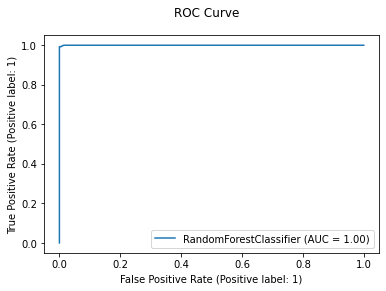

In [99]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

The AUC ROC Curve displays the ability of the classifier to distinguish between the categories present in a label. The larger the number on AUC results in better performing model which identifies positive and negative classes successfully showcasing the same on a graph.

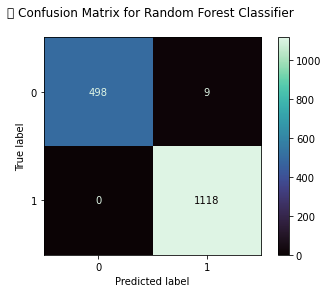

In [100]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako', normalize=None)
plt.title('\t Confusion Matrix for Random Forest Classifier \n')
plt.show()

The confusion matrix is used to basically analyze the output of a classifier on the test data set. All the dark non-diagonal elements indicate number of points that were missed by the model to be classified correctly. The higher the number on the diagonal matrix indicated that the model was able to capture correct prediction on calssification of edible and poisonous mushrooms.

# Saving the model

In [101]:
filename = "Mushroom.pkl"
joblib.dump(Final_Model, filename)

['Mushroom.pkl']

I am using the joblib option to save the final model but it can be done using pickle too.

# Loading the model

In [102]:
load_model = joblib.load(filename)
result = load_model.score(X_test, Y_test)
print(result*100)

99.44615384615385


Finally loading the saved final model to check the score on unseen data set.